# Homework 7

### Name : Anushka Kamath
### Github Username : anushkakamath
### USC email id : arkamath@usc.edu
### USC ID : 9418501008

Using 2 late days for this assignment

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import warnings
from sklearn.metrics import hamming_loss
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

https://stackoverflow.com/questions/14463277/how-to-disable-python-warnings

# 1. Multi-class and Multi-Label Classification Using Support Vector Machines

(a) Download the Anuran Calls (MFCCs) Data Set. Choose 70% of the data randomly as the training set.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html  
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


In [2]:
#df = pd.read_csv('Frogs_MFCCs.csv')
df = pd.read_csv('../data/Anuran Calls (MFCCs)/Frogs_MFCCs.csv')

In [3]:
df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


In [4]:
X, y = df.iloc[:, :-4], df.iloc[:, -4:-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [5]:
X_train

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
854,1.000000,-0.110506,0.296575,0.572484,0.106014,0.071651,0.026353,-0.057816,0.152764,0.184266,...,-0.003411,0.122159,0.188889,-0.048002,-0.197944,0.002446,0.106280,-0.000289,-0.030885,-0.013138
4279,1.000000,0.220624,0.242714,0.687612,0.278120,0.048901,-0.175033,0.045482,0.194987,-0.026137,...,0.239639,-0.258718,-0.181393,0.224083,0.189132,-0.086415,-0.142950,-0.061968,0.140081,0.177679
6530,1.000000,0.537389,0.411925,0.220964,0.082649,0.116707,0.030271,-0.025917,0.095736,0.055280,...,0.071234,-0.047150,-0.027571,0.040844,0.008839,0.020528,0.032644,-0.030302,-0.009163,0.073411
4445,1.000000,0.113471,0.141275,0.510700,0.171047,0.004309,-0.152609,-0.014724,0.187484,-0.021925,...,0.231469,-0.201889,-0.133748,0.223116,0.169808,-0.124180,-0.159812,-0.033042,0.185773,0.165372
4218,1.000000,0.240949,0.216480,0.461523,0.117414,-0.062445,-0.130187,0.112749,0.340813,0.070309,...,0.266955,-0.147366,-0.291212,0.032346,0.178339,0.043587,-0.123294,-0.113868,0.099137,0.182885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,1.000000,-0.142398,-0.135605,0.489808,0.346600,0.112585,0.022297,-0.050188,-0.039155,0.179645,...,-0.139727,0.206907,0.180459,-0.081065,-0.159301,-0.052028,0.050629,0.090996,0.076187,-0.029321
3264,1.000000,0.176691,0.010582,0.426816,0.159823,0.082286,-0.081110,0.071147,0.316694,0.125304,...,0.285737,0.008472,-0.254754,0.020172,0.245519,0.135507,-0.092764,-0.155646,0.041699,0.261644
1653,0.689976,1.000000,0.303498,0.320465,0.206091,0.334999,0.091622,0.184121,0.004056,0.002416,...,0.084504,0.019744,-0.110357,-0.097476,-0.036028,-0.066845,-0.007471,-0.004674,0.035157,0.028860
2607,1.000000,0.378678,0.430880,0.618243,0.075128,-0.008888,-0.106768,0.067784,0.266808,-0.084165,...,0.366652,-0.177005,-0.321548,0.112632,0.199011,-0.030374,-0.083440,-0.081388,0.101548,0.165429


In [6]:
X_test

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
7065,1.000000,0.021356,0.712023,0.540959,0.006561,-0.012396,-0.039906,0.206433,0.224516,-0.132646,...,0.051908,-0.035645,-0.014739,-0.013848,0.037481,0.024981,-0.023636,-0.002246,0.005065,0.018771
4872,1.000000,0.235776,0.179336,0.507825,0.273008,0.079647,-0.067376,-0.122296,0.199550,0.364925,...,0.262993,0.431613,-0.069858,-0.271286,-0.113661,0.123132,0.212194,0.119816,-0.215875,-0.174891
4034,1.000000,0.427119,0.220125,0.562979,0.244256,0.076368,-0.071603,0.065820,0.259136,0.067629,...,0.295001,-0.092311,-0.222549,0.067043,0.140408,0.001615,-0.126533,-0.169823,0.065475,0.178421
1281,1.000000,0.477524,0.395977,0.592311,0.140795,0.095441,-0.032305,0.071193,0.254858,0.050204,...,0.399889,-0.177770,-0.304246,0.197333,0.163456,-0.107861,-0.150726,-0.037881,0.171868,0.204688
5320,1.000000,0.779936,0.889201,0.647043,-0.119976,0.454679,0.229667,-0.042258,0.178106,-0.048459,...,-0.126256,-0.359099,0.221083,0.128259,-0.177551,0.008307,0.078499,0.090189,0.058105,-0.073452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442,1.000000,0.190378,0.168078,0.533279,0.158308,0.032014,-0.125586,0.031769,0.277680,0.073812,...,0.342145,-0.124754,-0.309822,0.048301,0.158747,-0.009163,-0.162442,-0.156454,0.059776,0.239506
333,1.000000,0.603183,0.582660,0.545139,-0.130699,-0.008604,0.414064,0.060287,-0.245134,0.148539,...,-0.111178,0.148627,0.042984,-0.088764,0.066496,0.090521,-0.125988,0.020015,0.118115,-0.005771
5182,0.701737,1.000000,0.590480,0.014940,0.207280,0.152265,0.138374,0.016109,0.106136,-0.058897,...,-0.011714,0.029921,0.024935,0.080376,0.016874,0.061348,0.035824,-0.019145,0.053943,-0.026383
690,1.000000,0.295821,0.092314,0.277354,0.244391,0.269368,0.128942,-0.163462,-0.251043,0.045557,...,-0.049377,0.011219,-0.080252,-0.141721,0.025281,0.144518,-0.011897,-0.083317,0.005429,-0.026163


(b) Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes. One of the most important approaches to multi-label classification is to train a classifier for each label (binary relevance).

i. Research exact match and hamming score/ loss methods for evaluating multi- label classification and use them in evaluating the classifiers in this problem.

ANS:  
HAMMING LOSS : Hamming loss is the fraction of labels that are incorrectly predicted.

EXACT MATCH : Exact Match metric refers to the number of matching values between true and predicted values, divided by number of values. 

Other metrics for evaluating multi- label classification are :
1. Exact Match Ratio (EMR)
2. 0/1 Loss
3. Hamming Loss
4. Example-Based Accuracy
5. Example-Based Accuracy
6. Example-Based Precision
7. Label Based Metrics
8. Macro Averaged Accuracy
9. Macro Averaged Precision
10. Macro Averaged Recall
11. Micro Averaged Accuracy
12. Micro Averaged Precision
13. Micro Averaged Recall
14. α- Evaluation Score
15. Accuracy
16. Precision
17. Recall
18. F1-Measure

https://mmuratarat.github.io/2020-01-25/multilabel_classification_metrics
https://medium.datadriveninvestor.com/a-survey-of-evaluation-metrics-for-multilabel-classification-bb16e8cd41cd

(b)  
ii. Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation. You are welcome to try to solve the problem with both standardized 2 and raw attributes and report the results.


Gaussian kernel -> kernel = 'rbf'  
https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/  
https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html  
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html.  
https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html. 
https://www.vebuso.com/2020/03/svm-hyperparameter-tuning-using-gridsearchcv/
https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/  
https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html 
https://machinelearningmastery.com/one-vs-rest-and-one-vs-one-for-multi-class-classification/ 
https://piazza.com/class/l7149q4oxue34e/post/laalr30igty67x  
https://mmuratarat.github.io/2020-01-25/multilabel_classification_metrics



In [7]:
y_train_family, y_test_family = y_train['Family'], y_test['Family']
y_train_genus, y_test_genus = y_train['Genus'], y_test['Genus']
y_train_species, y_test_species = y_train['Species'], y_test['Species']

In [8]:
def exact_match(y_true, y_pred):
    match, mismatch = 0, 0

    for i in range(y_true.shape[0]):
      if y_true[i] == y_pred[i]:
        match += 1
      else:
        mismatch += 1
    exact = (match)/(match+mismatch)
    return exact

In [9]:
# param_grid = {'estimator__gamma':np.linspace(0.1, 2, 20), 'estimator__C':np.logspace(-1, 4, 20)}
# param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf']}
# param_grid = {'estimator__gamma': [1,0.1,0.01,0.001], 'estimator__C': [0.1,1, 10, 100], 'kernel': ['rbf']}
# CRange = np.logspace(-1, 4, 20)
# gammaRange = np.linspace(0.1, 2, 20)

c_range = np.logspace(-1, 4, 5)
gamma_range = np.linspace(0.1, 2, 5)
param_grid = dict(estimator__gamma=gamma_range, estimator__C=c_range)
svclassifier = OneVsRestClassifier(SVC(kernel='rbf'))
model_family = GridSearchCV(svclassifier, param_grid, cv=KFold(10))
model_family = model_family.fit(X_train, y_train_family)
y_pred_family = model_family.predict(X_test)

In [10]:
print("Values for label Family for Gaussian Kernel : ")
gauss_family_loss = hamming_loss(y_test_family, y_pred_family)
print("The SVM penalty = ", model_family.best_params_['estimator__C'])
print("The SVM width = ", model_family.best_params_['estimator__gamma'])
print("Hamming Loss = ", gauss_family_loss)
print("Exact Match = ", 1-gauss_family_loss)

print(confusion_matrix(y_test_family, y_pred_family))
print(classification_report(y_test_family, y_pred_family))

Values for label Family for Gaussian Kernel : 
The SVM penalty =  31.622776601683793
The SVM width =  1.525
Hamming Loss =  0.005094951366373321
Exact Match =  0.9949050486336267
[[  19    0    0    1]
 [   0  154    1    0]
 [   0    0  653    4]
 [   0    0    5 1322]]
                 precision    recall  f1-score   support

      Bufonidae       1.00      0.95      0.97        20
  Dendrobatidae       1.00      0.99      1.00       155
        Hylidae       0.99      0.99      0.99       657
Leptodactylidae       1.00      1.00      1.00      1327

       accuracy                           0.99      2159
      macro avg       1.00      0.98      0.99      2159
   weighted avg       0.99      0.99      0.99      2159



In [11]:
c_range = np.logspace(-1, 4, 5)
gamma_range = np.linspace(0.1, 2, 5)
param_grid = dict(estimator__gamma=gamma_range, estimator__C=c_range)
svclassifier = OneVsRestClassifier(SVC(kernel='rbf'))
model_genus = GridSearchCV(svclassifier, param_grid, cv=KFold(10))
model_genus = model_genus.fit(X_train, y_train_genus)
y_pred_genus = model_genus.predict(X_test)

In [12]:
print("Values for label Genus for Gaussian Kernel : ")
gauss_genus_loss = hamming_loss(y_test_genus, y_pred_genus)

print("The SVM penalty = ",model_genus.best_params_['estimator__C'])
print("The SVM width = ",model_genus.best_params_['estimator__gamma'])
print("Hamming Loss = ", gauss_genus_loss)
print("Exact Match = ", 1 - gauss_genus_loss)

print(confusion_matrix(y_test_genus, y_pred_genus))
print(classification_report(y_test_genus, y_pred_genus))

Values for label Genus for Gaussian Kernel : 
The SVM penalty =  31.622776601683793
The SVM width =  2.0
Hamming Loss =  0.006484483557202408
Exact Match =  0.9935155164427976
[[1238    0    2    0    0    0    0    0]
 [   0  155    0    0    0    0    0    0]
 [   1    0   95    0    0    0    0    0]
 [   3    0    1  479    1    2    0    0]
 [   0    0    0    1   86    0    0    0]
 [   0    0    0    2    0   26    0    0]
 [   1    0    0    0    0    0   19    0]
 [   0    0    0    0    0    0    0   47]]
               precision    recall  f1-score   support

    Adenomera       1.00      1.00      1.00      1240
     Ameerega       1.00      1.00      1.00       155
Dendropsophus       0.97      0.99      0.98        96
    Hypsiboas       0.99      0.99      0.99       486
Leptodactylus       0.99      0.99      0.99        87
Osteocephalus       0.93      0.93      0.93        28
     Rhinella       1.00      0.95      0.97        20
       Scinax       1.00      1.00    

In [13]:
c_range = np.logspace(-1, 4, 5)
gamma_range = np.linspace(0.1, 2, 5)
param_grid = dict(estimator__gamma=gamma_range, estimator__C=c_range)
svclassifier = OneVsRestClassifier(SVC(kernel='rbf'))
model_species = GridSearchCV(svclassifier, param_grid, cv=KFold(10))
model_species = model_species.fit(X_train, y_train_species)
y_pred_species = model_species.predict(X_test)

In [14]:
print("Values for label Species for Gaussian Kernel : ")
gauss_species_loss = hamming_loss(y_test_species, y_pred_species)
print("The SVM penalty = ", model_species.best_params_['estimator__C'])
print("The SVM width = ", model_species.best_params_['estimator__gamma'])
print("Hamming Loss = ", gauss_species_loss)
print("Exact Match = ", 1-gauss_species_loss)

print(confusion_matrix(y_test_species, y_pred_species))
print(classification_report(y_test_species, y_pred_species))

Values for label Species for Gaussian Kernel : 
The SVM penalty =  31.622776601683793
The SVM width =  1.525
Hamming Loss =  0.008337193144974525
Exact Match =  0.9916628068550255
[[ 207    1    0    2    0    0    0    0    0    1]
 [   0 1028    0    1    0    0    0    0    0    0]
 [   0    0  155    0    0    0    0    0    0    0]
 [   0    1    0   95    0    0    0    0    0    0]
 [   0    0    0    0  150    0    0    1    0    0]
 [   0    3    0    1    0  328    1    2    0    0]
 [   0    0    0    0    0    0   86    1    0    0]
 [   0    0    0    0    1    0    1   26    0    0]
 [   0    1    0    0    0    0    0    0   19    0]
 [   0    0    0    0    0    0    0    0    0   47]]
                        precision    recall  f1-score   support

        AdenomeraAndre       1.00      0.98      0.99       211
AdenomeraHylaedactylus       0.99      1.00      1.00      1029
    Ameeregatrivittata       1.00      1.00      1.00       155
            HylaMinuta       0.9

(b)  
iii. Repeat 1(b)ii with L1-penalized SVMs. Remember to standardize the attributes. Determine the weight of the SVM penalty using 10 fold cross validation.

https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html


In [15]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

In [16]:
param_grid = {'SVC__C':np.arange(0.01,100,10)}
clf = Pipeline([('scale', StandardScaler()), ('SVC',LinearSVC(penalty='l1', loss="squared_hinge", dual=False, tol=1e-3))])
model_family = GridSearchCV(clf, param_grid, cv=KFold(10))
model_family = model_family.fit(X_train_std, y_train_family)

In [17]:
y_pred_family = model_family.predict(X_test_std)
l1_family_loss = hamming_loss(y_test_family, y_pred_family)
print("Values for label Family with L1-penalized SVM ")
print("The SVM penalty = ",model_family.best_params_['SVC__C'])
print("Hamming Loss = ", hamming_loss(y_test_family, y_pred_family))
print("Exact Match = ", 1-l1_family_loss)

print(confusion_matrix(y_test_family, y_pred_family))
print(classification_report(y_test_family, y_pred_family))

Values for label Family with L1-penalized SVM 
The SVM penalty =  10.01
Hamming Loss =  0.0666975451597962
Exact Match =  0.9333024548402038
[[   0    0   18    2]
 [   0  143    8    4]
 [   1    4  589   63]
 [   0   18   26 1283]]
                 precision    recall  f1-score   support

      Bufonidae       0.00      0.00      0.00        20
  Dendrobatidae       0.87      0.92      0.89       155
        Hylidae       0.92      0.90      0.91       657
Leptodactylidae       0.95      0.97      0.96      1327

       accuracy                           0.93      2159
      macro avg       0.68      0.70      0.69      2159
   weighted avg       0.93      0.93      0.93      2159



In [18]:
param_grid = {'SVC__C':np.arange(0.01,100,10)}
clf = Pipeline([('scale', StandardScaler()), ('SVC',LinearSVC(penalty='l1', loss="squared_hinge", dual=False, tol=1e-3))])
model_genus = GridSearchCV(clf, param_grid, cv=KFold(10))
model_genus = model_genus.fit(X_train_std, y_train_genus)

In [19]:
y_pred_genus = model_genus.predict(X_test_std)
l1_genus_loss = hamming_loss(y_test_genus, y_pred_genus)
print("Values for label Genus with L1-penalized SVM")
print("The SVM penalty = ", model_genus.best_params_['SVC__C'])
print("Hamming Loss = ", l1_genus_loss)
print("Exact Match = ", 1-l1_genus_loss)

print(confusion_matrix(y_test_genus, y_pred_genus))
print(classification_report(y_test_genus, y_pred_genus))

Values for label Genus with L1-penalized SVM
The SVM penalty =  10.01
Hamming Loss =  0.05141269106067624
Exact Match =  0.9485873089393237
[[1221   11    3    4    0    0    0    1]
 [   3  150    1    1    0    0    0    0]
 [  27    4   60    5    0    0    0    0]
 [  19    0    0  464    2    1    0    0]
 [   0    0    2    4   80    1    0    0]
 [   2    0    0   12    0   14    0    0]
 [   4    0    0    2    0    0   14    0]
 [   1    0    0    1    0    0    0   45]]
               precision    recall  f1-score   support

    Adenomera       0.96      0.98      0.97      1240
     Ameerega       0.91      0.97      0.94       155
Dendropsophus       0.91      0.62      0.74        96
    Hypsiboas       0.94      0.95      0.95       486
Leptodactylus       0.98      0.92      0.95        87
Osteocephalus       0.88      0.50      0.64        28
     Rhinella       1.00      0.70      0.82        20
       Scinax       0.98      0.96      0.97        47

     accuracy     

In [20]:
param_grid = {'SVC__C':np.arange(0.01,100,10)}
clf = Pipeline([('scale', StandardScaler()), ('SVC',LinearSVC(penalty='l1', loss="squared_hinge", dual=False, tol=1e-3))])
model_species = GridSearchCV(clf, param_grid, cv=KFold(10))
model_species = model_species.fit(X_train_std, y_train_species)

In [21]:
y_pred_species = model_species.predict(X_test_std)
l1_species_loss =  hamming_loss(y_test_species, y_pred_species)
print("Values for label Species with L1-penalized SVM")
print("The SVM penalty = ",model_species.best_params_['SVC__C'])
print("Hamming Loss = ", l1_species_loss)
print("Exact Match = ", 1-l1_species_loss)

print(confusion_matrix(y_test_species, y_pred_species))
print(classification_report(y_test_species, y_pred_species))

Values for label Species with L1-penalized SVM
The SVM penalty =  10.01
Hamming Loss =  0.042612320518758684
Exact Match =  0.9573876794812413
[[ 195    0   11    0    0    4    0    0    0    1]
 [   0 1028    1    0    0    0    0    0    0    0]
 [   1    0  151    1    0    2    0    0    0    0]
 [  10    9    6   68    0    3    0    0    0    0]
 [   3    0    0    0  143    5    0    0    0    0]
 [   0    5    0    0    4  319    4    1    2    0]
 [   1    0    0    2    0    2   82    0    0    0]
 [   1    0    0    0    5    5    0   17    0    0]
 [   1    1    0    0    0    0    0    0   18    0]
 [   0    0    0    0    0    0    0    0    1   46]]
                        precision    recall  f1-score   support

        AdenomeraAndre       0.92      0.92      0.92       211
AdenomeraHylaedactylus       0.99      1.00      0.99      1029
    Ameeregatrivittata       0.89      0.97      0.93       155
            HylaMinuta       0.96      0.71      0.81        96
  Hyp

iv. Repeat 1(b) iii by using SMOTE or any other method you know to remedy class imbalance. Report your conclusions about the classifiers you trained.

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html



In [22]:
param_grid = {'SVC__C':np.arange(0.01,100,10)}
clf = Pipeline([('scale', StandardScaler()), ('SVC',LinearSVC(penalty='l1', loss="squared_hinge", dual=False, tol=1e-3))])

sm = SMOTE(random_state = 2)
X_train_sm, y_train_family_sm = sm.fit_resample(X_train, y_train_family)
X_test_sm, y_test_family_sm = sm.fit_resample(X_test, y_test_family)


In [23]:
model_family = GridSearchCV(clf, param_grid, cv=KFold(10))
model_family = model_family.fit(X_train_sm, y_train_family_sm)

In [24]:
y_pred_family = model_family.predict(X_test_sm)
sm_family_loss = hamming_loss(y_test_family_sm, y_pred_family)
print("Values for label Family after SMOTE")

print("The SVM penalty = ", model_family.best_params_['SVC__C'])
print("Hamming Loss = ", sm_family_loss)
print("Exact Match = ", 1 - sm_family_loss)

print(confusion_matrix(y_test_family_sm, y_pred_family))
print(classification_report(y_test_family_sm, y_pred_family))

Values for label Family after SMOTE
The SVM penalty =  30.01
Hamming Loss =  0.06801055011303693
Exact Match =  0.9319894498869631
[[1225    0    0  102]
 [   0 1316   10    1]
 [  39   29 1175   84]
 [  22   41   33 1231]]
                 precision    recall  f1-score   support

      Bufonidae       0.95      0.92      0.94      1327
  Dendrobatidae       0.95      0.99      0.97      1327
        Hylidae       0.96      0.89      0.92      1327
Leptodactylidae       0.87      0.93      0.90      1327

       accuracy                           0.93      5308
      macro avg       0.93      0.93      0.93      5308
   weighted avg       0.93      0.93      0.93      5308



In [25]:
X_train_sm, y_train_genus_sm = sm.fit_resample(X_train, y_train_genus)
X_test_sm, y_test_genus_sm = sm.fit_resample(X_test, y_test_genus)

In [26]:
model_genus = GridSearchCV(clf, param_grid, cv=KFold(10))
model_genus = model_genus.fit(X_train_sm, y_train_genus_sm)
y_pred_genus = model_genus.predict(X_test_sm)
sm_genus_loss = hamming_loss(y_test_genus_sm, y_pred_genus)
print("Values for label Genus after SMOTE")

print("The SVM penalty = ", model_genus.best_params_['SVC__C'])
print("Hamming Loss = ", hamming_loss(y_test_genus_sm, y_pred_genus))
print("Exact Match = ", 1 - sm_genus_loss)

print(confusion_matrix(y_test_genus_sm, y_pred_genus))
print(classification_report(y_test_genus_sm, y_pred_genus))

Values for label Genus after SMOTE
The SVM penalty =  50.01
Hamming Loss =  0.057560483870967745
Exact Match =  0.9424395161290322
[[1114   41   40    6    0   26   12    1]
 [   0 1221   15    4    0    0    0    0]
 [  68    0 1114   16    0    0   42    0]
 [  38    0    0 1142   13   27   20    0]
 [   0    0    9   20 1200   11    0    0]
 [  10    0    0   39    0 1191    0    0]
 [ 104    0    0    0    0    0 1136    0]
 [   0    0    0    0    0    0    9 1231]]
               precision    recall  f1-score   support

    Adenomera       0.84      0.90      0.87      1240
     Ameerega       0.97      0.98      0.98      1240
Dendropsophus       0.95      0.90      0.92      1240
    Hypsiboas       0.93      0.92      0.93      1240
Leptodactylus       0.99      0.97      0.98      1240
Osteocephalus       0.95      0.96      0.95      1240
     Rhinella       0.93      0.92      0.92      1240
       Scinax       1.00      0.99      1.00      1240

     accuracy              

In [27]:
X_train_sm, y_train_species_sm = sm.fit_resample(X_train, y_train_species)
X_test_sm, y_test_species_sm = sm.fit_resample(X_test, y_test_species)

In [28]:
model_species = GridSearchCV(clf, param_grid, cv=KFold(10))
model_species = model_species.fit(X_train_sm, y_train_species_sm)
y_pred_species = model_species.predict(X_test_sm)
sm_species_loss = hamming_loss(y_test_species_sm, y_pred_species)

print("Values for label Species after SMOTE") 

print("The SVM penalty = ", model_species.best_params_['SVC__C'])
print("Hamming Loss = ", hamming_loss(y_test_species_sm, y_pred_species))
print("Exact Match = ", 1 - sm_species_loss)

print(confusion_matrix(y_test_species_sm, y_pred_species))
print(classification_report(y_test_species_sm, y_pred_species))

Values for label Species after SMOTE
The SVM penalty =  90.01
Hamming Loss =  0.0521865889212828
Exact Match =  0.9478134110787172
[[ 929    0   45   35    3    2    0    6    3    6]
 [   0 1025    1    0    0    0    0    0    1    2]
 [   0    0 1012    9    0    7    0    0    1    0]
 [  61    0    4  914    0   22    0    0   28    0]
 [  17    0    0    0  974   24    0   14    0    0]
 [   0   15    0    0   19  959   11    8   17    0]
 [   0    0    0   10    0   18  996    5    0    0]
 [   0    0    0    0   51   15    0  963    0    0]
 [  36   32    0    0    0    0    0    0  961    0]
 [   0    0    0    0    0    0    0    0    9 1020]]
                        precision    recall  f1-score   support

        AdenomeraAndre       0.89      0.90      0.90      1029
AdenomeraHylaedactylus       0.96      1.00      0.98      1029
    Ameeregatrivittata       0.95      0.98      0.97      1029
            HylaMinuta       0.94      0.89      0.92      1029
  HypsiboasCinera

In [29]:
index = ["Family", "Genus", "Species"]
col = ["Gaussian Kernel SVM", "L1-Penalized SVM", "SMOTE L1-Penalized SVM"]
data = [[gauss_family_loss, l1_family_loss, sm_family_loss], 
        [gauss_genus_loss, l1_genus_loss, sm_genus_loss], 
        [gauss_species_loss, l1_species_loss, sm_species_loss]]

values = pd.DataFrame(data, index=index, columns=col)

In [43]:
values

,Gaussian Kernel SVM,L1-Penalized SVM,SMOTE L1-Penalized SVM
Family,0.005095,0.066698,0.068011
Genus,0.006484,0.051413,0.057560
Species,0.008337,0.042612,0.052187


# 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set 

(a) Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split the data into train and test, as we are not performing supervised learning in this exercise). Choose k ∈ {1, 2, . . . , 50} automatically based on one of the methods provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any other method you know.


https://stackoverflow.com/questions/18265935/how-do-i-create-a-list-with-numbers-between-two-values  
https://stackoverflow.com/questions/51138686/how-to-use-silhouette-score-in-k-means-clustering-from-sklearn-library
https://stackoverflow.com/questions/15222754/groupby-pandas-dataframe-and-select-most-common-value

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html
https://medium.datadriveninvestor.com/a-survey-of-evaluation-metrics-for-multilabel-classification-bb16e8cd41cd
https://mmuratarat.github.io/2020-01-25/multilabel_classification_metrics

In [30]:
X, y = df.iloc[:, :-4], df.iloc[:, -4:-1]

In [ ]:
kclusters = list(range(2, 51))
score_list = []

for k in kclusters:
  kmodel = KMeans(n_clusters = k)
  kmodel = kmodel.fit(X)
  labels = kmodel.labels_
  score = silhouette_score(X, labels)
  score_list.append(score)


In [32]:
max_score = max(score_list)
k_value = 2 + score_list.index(max(score_list))
print("The k value = {} and the corresponding Silhouette Score = {}".format(k_value, max_score))

The k value = 4 and the corresponding Silhouette Score = 0.3788646212055977


In [33]:
best_kmodel = KMeans(n_clusters = k_value)
best_kmodel = best_kmodel.fit(X)
pred = best_kmodel.predict(X)
y["label"] = pred

(b) In each cluster, determine which family is the majority by reading the true labels. Repeat for genus and species.

https://stackoverflow.com/questions/15222754/groupby-pandas-dataframe-and-select-most-common-value 


In [35]:
family_majority = y.groupby("label")["Family"].agg(pd.Series.mode)
print("FAMILY : Majority labels")
print(family_majority)

FAMILY : Majority labels
label
0    Leptodactylidae
1      Dendrobatidae
2            Hylidae
3            Hylidae
Name: Family, dtype: object


In [36]:
genus_majority = y.groupby("label")["Genus"].agg(pd.Series.mode)
print("GENUS : Majority labels")
print(genus_majority)

GENUS : Majority labels
label
0    Adenomera
1     Ameerega
2    Hypsiboas
3    Hypsiboas
Name: Genus, dtype: object


In [37]:
species_majority = y.groupby("label")["Species"].agg(pd.Series.mode)
print("SPECIES : Majority labels")
print(species_majority)

SPECIES : Majority labels
label
0    AdenomeraHylaedactylus
1        Ameeregatrivittata
2         HypsiboasCordobae
3      HypsiboasCinerascens
Name: Species, dtype: object


(c) Now for each cluster you have a majority label triplet (family, genus, species). Calculate the average Hamming distance, Hamming score, and Hamming loss between the true labels and the labels assigned by clusters.


https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html

https://www.geeksforgeeks.org/python-initializing-dictionary-with-empty-lists/. 


https://www.geeksforgeeks.org/create-a-pandas-dataframe-from-lists/

https://stackoverflow.com/questions/25440008/python-pandas-flatten-a-dataframe-to-a-list

https://numpy.org/doc/stable/reference/generated/numpy.not_equal.html   
https://www.geeksforgeeks.org/numpy-not_equal-python/




In [41]:
from sklearn.cluster import MiniBatchKMeans
X, y = df.iloc[:, :-4], df.iloc[:, -4:-1]
y_family = y['Family']
y_genus = y['Genus']
y_species = y['Species']
columns = ['Family', 'Genus', 'Species']
hamming_distance_list = []
hamming_score_list = []
hamming_loss_list = []

for i in range(50):
    scores = []
    total = dict()

    for kval in range(2, 50):
        kmodel = MiniBatchKMeans(n_clusters = kval)
        kmodel = kmodel.fit(X)
        labels = kmodel.labels_
        scores.append(silhouette_score(X, labels))

    maxk = 2 + scores.index(max(scores))
        
    kmeans = KMeans(n_clusters = maxk)
    kmeans = kmeans.fit(X)
    labels = kmeans.labels_
    num_labels = len(labels)

    family_count = {new_list: [] for new_list in range(maxk)}
    genus_count = {new_list: [] for new_list in range(maxk)}
    species_count = {new_list: [] for new_list in range(maxk)}
    family_max = {new_list: [] for new_list in range(maxk)}
    genus_max = {new_list: [] for new_list in range(maxk)}
    species_max = {new_list: [] for new_list in range(maxk)}

    for l in range(num_labels):
      family_count[labels[l]].append(y_family[l])
      genus_count[labels[l]].append(y_genus[l])
      species_count[labels[l]].append(y_species[l])
    
    for key in family_count:
      family_max[key] = max(family_count[key], key = family_count[key].count)  
      genus_max[key] = max(genus_count[key], key = genus_count[key].count)
      species_max[key] = max(species_count[key], key = species_count[key].count)

      total[key] = [family_max[key],genus_max[key],species_max[key]]
        
    y_pred = []
    for c in labels:
        y_pred.append(total[c])

    y_pred = pd.DataFrame(y_pred, columns=columns)

    denom = len(y.values.reshape(-1))
    hamming_distance = np.sum(np.not_equal(y.to_numpy(), y_pred.to_numpy()))
    hamming_loss = hamming_distance / denom 
    hamming_score = 1 - hamming_loss
    
    print("Iteration i = ", i+1)
    print("Best k = ", maxk)
    print("Hamming Distance = ", hamming_distance)
    print("Hamming Score = ", hamming_score)
    print("Hamming Loss = ", hamming_loss)
    hamming_distance_list.append(hamming_distance)
    hamming_score_list.append(hamming_score)
    hamming_loss_list.append(hamming_loss)
    

Iteration i =  1
Best k =  3
Hamming Distance =  6407
Hamming Score =  0.7031735001158212
Hamming Loss =  0.2968264998841788
Iteration i =  2
Best k =  3
Hamming Distance =  6407
Hamming Score =  0.7031735001158212
Hamming Loss =  0.2968264998841788
Iteration i =  3
Best k =  4
Hamming Distance =  4801
Hamming Score =  0.7775770210794533
Hamming Loss =  0.2224229789205467
Iteration i =  4
Best k =  4
Hamming Distance =  4801
Hamming Score =  0.7775770210794533
Hamming Loss =  0.2224229789205467
Iteration i =  5
Best k =  3
Hamming Distance =  6406
Hamming Score =  0.7032198285846653
Hamming Loss =  0.29678017141533475
Iteration i =  6
Best k =  4
Hamming Distance =  5294
Hamming Score =  0.7547370859393097
Hamming Loss =  0.24526291406069028
Iteration i =  7
Best k =  4
Hamming Distance =  4801
Hamming Score =  0.7775770210794533
Hamming Loss =  0.2224229789205467
Iteration i =  8
Best k =  4
Hamming Distance =  5291
Hamming Score =  0.754876071345842
Hamming Loss =  0.2451239286541579

In [42]:
avg_hamming_distance = sum(hamming_distance_list) / len(hamming_distance_list)
avg_hamming_score = sum(hamming_score_list) / len(hamming_score_list)
avg_hamming_loss = sum(hamming_loss_list) / len(hamming_loss_list)

print("Average Hamming Distance: ", avg_hamming_distance)
print("Average Hamming Score: ", avg_hamming_score)
print("Average Hamming Loss: ", avg_hamming_loss)

Average Hamming Distance:  4740.56
Average Hamming Score:  0.7803771137363907
Average Hamming Loss:  0.21962288626360887


#ISLR 12.6.2

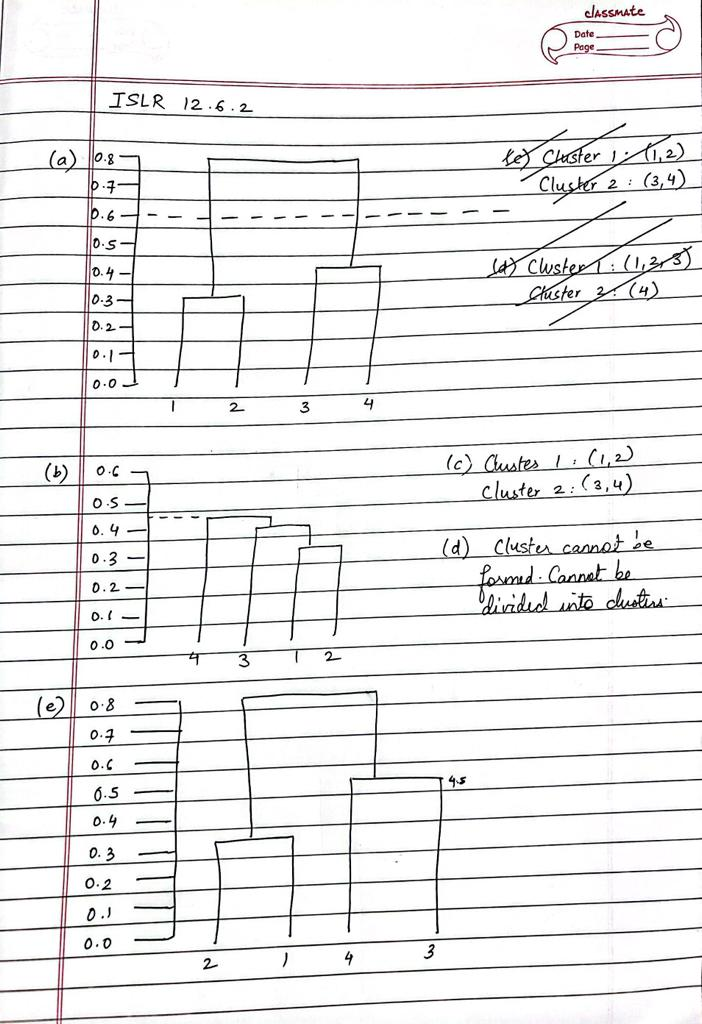